In [32]:
#!pip install eli5

^C


In [13]:
from embeddings_loader import *
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import pickle
#import eli5

In [2]:
train_labels, dev_labels, test_labels = load_labels()

In [3]:
def computeAllScores(y_pred_train, y_pred_dev, y_pred_test):
    print("Accuracy Train: ", accuracy_score(train_labels, y_pred_train))
    print("Accuracy Dev: ", accuracy_score(dev_labels, y_pred_dev))
    print("Accuracy Test: ", accuracy_score(test_labels, y_pred_test))
    print("F1 Train: ", f1_score(train_labels, y_pred_train, average='weighted'))
    print("F1 Dev: ", f1_score(dev_labels, y_pred_dev, average='weighted'))
    print("F1 Test: ", f1_score(test_labels, y_pred_test, average='weighted'))
    print("Precision Train: ", precision_score(train_labels, y_pred_train, average='weighted'))
    print("Precision Dev: ", precision_score(dev_labels, y_pred_dev, average='weighted'))
    print("Precision Test: ", precision_score(test_labels, y_pred_test, average='weighted'))
    print("Recall Train: ", recall_score(train_labels, y_pred_train, average='weighted'))
    print("Recall Dev: ", recall_score(dev_labels, y_pred_dev, average='weighted'))
    print("Recall Test: ", recall_score(test_labels, y_pred_test, average='weighted'))
    # Confusion Matrix
    print("Confusion Matrix Train: ")
    print(confusion_matrix(train_labels, y_pred_train))
    print("Confusion Matrix Dev: ")
    print(confusion_matrix(dev_labels, y_pred_dev))
    print("Confusion Matrix Test: ")
    print(confusion_matrix(test_labels, y_pred_test))

In [4]:
label_replacement = {
    'Hope_speech': 0,
    'Non_hope_speech': 1,
    'not-English': 2,
}

In [5]:
# Replace labels with numbers
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

### Glove Twitter 25

In [6]:
gt25_train, gt25_dev, gt25_test = load_glove_twitter_25()

In [7]:
# Set all NaN values to 0
gt25_train = np.nan_to_num(gt25_train)
gt25_dev = np.nan_to_num(gt25_dev)
gt25_test = np.nan_to_num(gt25_test)

In [8]:
gt25_train.shape

(22762, 25)

In [9]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(gt25_train, train_labels)

In [10]:
train_preds = adaboost.predict(gt25_train)
dev_preds = adaboost.predict(gt25_dev)
test_preds = adaboost.predict(gt25_test)

In [11]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8651260873385467
Accuracy Dev:  0.8519169890960253
Accuracy Test:  0.8601546029515109
F1 Train:  0.8634566175906272
F1 Dev:  0.8489363515665327
F1 Test:  0.8574536741888351
Precision Train:  0.8619090918965455
Precision Dev:  0.8460501248740658
Precision Test:  0.8548172854067758
Recall Train:  0.8651260873385467
Recall Dev:  0.8519169890960253
Recall Test:  0.8601546029515109
Confusion Matrix Train: 
[[  383  1579     0]
 [ 1478 19298     2]
 [    0    11    11]]
Confusion Matrix Dev: 
[[  52  220    0]
 [ 199 2370    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  44  206    0]
 [ 189 2404    0]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
filename = 'adab_gt25.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### FastText 300 

In [16]:
ft300_train, ft300_dev, ft300_test = load_fasttext_300()

In [17]:
# Set all NaN values to 0
ft300_train = np.nan_to_num(ft300_train)
ft300_dev = np.nan_to_num(ft300_dev)
ft300_test = np.nan_to_num(ft300_test)

In [18]:
ft300_train.shape

(22762, 300)

In [19]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(ft300_train, train_labels)

In [20]:
train_preds = adaboost.predict(ft300_train)
dev_preds = adaboost.predict(ft300_dev)
test_preds = adaboost.predict(ft300_test)

In [21]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8152183463667516
Accuracy Dev:  0.8030249736194162
Accuracy Test:  0.8056921995783556
F1 Train:  0.8392536332744309
F1 Dev:  0.8241782535566733
F1 Test:  0.8317152215447067
Precision Train:  0.8707648989764
Precision Dev:  0.8508081571312525
Precision Test:  0.86658808212413
Recall Train:  0.8152183463667516
Recall Dev:  0.8030249736194162
Recall Test:  0.8056921995783556
Confusion Matrix Train: 
[[  718  1244     0]
 [ 2955 17821     2]
 [    0     5    17]]
Confusion Matrix Dev: 
[[  87  185    0]
 [ 373 2196    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  94  156    0]
 [ 394 2199    0]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
filename = 'adab_ft300.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### Word2Vec 300

In [23]:
w2v300_train, w2v300_dev, w2v300_test = load_word2vec_300()

In [24]:
# Set all NaN values to 0
w2v300_train = np.nan_to_num(w2v300_train)
w2v300_dev = np.nan_to_num(w2v300_dev)
w2v300_test = np.nan_to_num(w2v300_test)

In [25]:
w2v300_train.shape

(22762, 300)

In [26]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(w2v300_train, train_labels)

In [27]:
train_preds = adaboost.predict(w2v300_train)
dev_preds = adaboost.predict(w2v300_dev)
test_preds = adaboost.predict(w2v300_test)

In [28]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8242685177049468
Accuracy Dev:  0.8195568061906436
Accuracy Test:  0.82536893886156
F1 Train:  0.8472376352180637
F1 Dev:  0.8402267907520905
F1 Test:  0.8478456111422413
Precision Train:  0.8786065874502614
Precision Dev:  0.8687258102343165
Precision Test:  0.8794535266335024
Recall Train:  0.8242685177049468
Recall Dev:  0.8195568061906436
Recall Test:  0.82536893886156
Confusion Matrix Train: 
[[  831  1131     0]
 [ 2860 17918     0]
 [    0     9    13]]
Confusion Matrix Dev: 
[[ 120  152    0]
 [ 359 2210    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 115  135    0]
 [ 358 2234    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
filename = 'adab_w2v300.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### TF-IDF PCA (1000 Dims)

In [30]:
tfidf_pca_train, tfidf_pca_dev, tfidf_pca_test = load_tfidf_pca()

In [31]:
tfidf_pca_train.shape

(22762, 1000)

In [32]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(tfidf_pca_train, train_labels)

In [33]:
features = np.array([f"pc{i}" for i in range(1, 1001)])

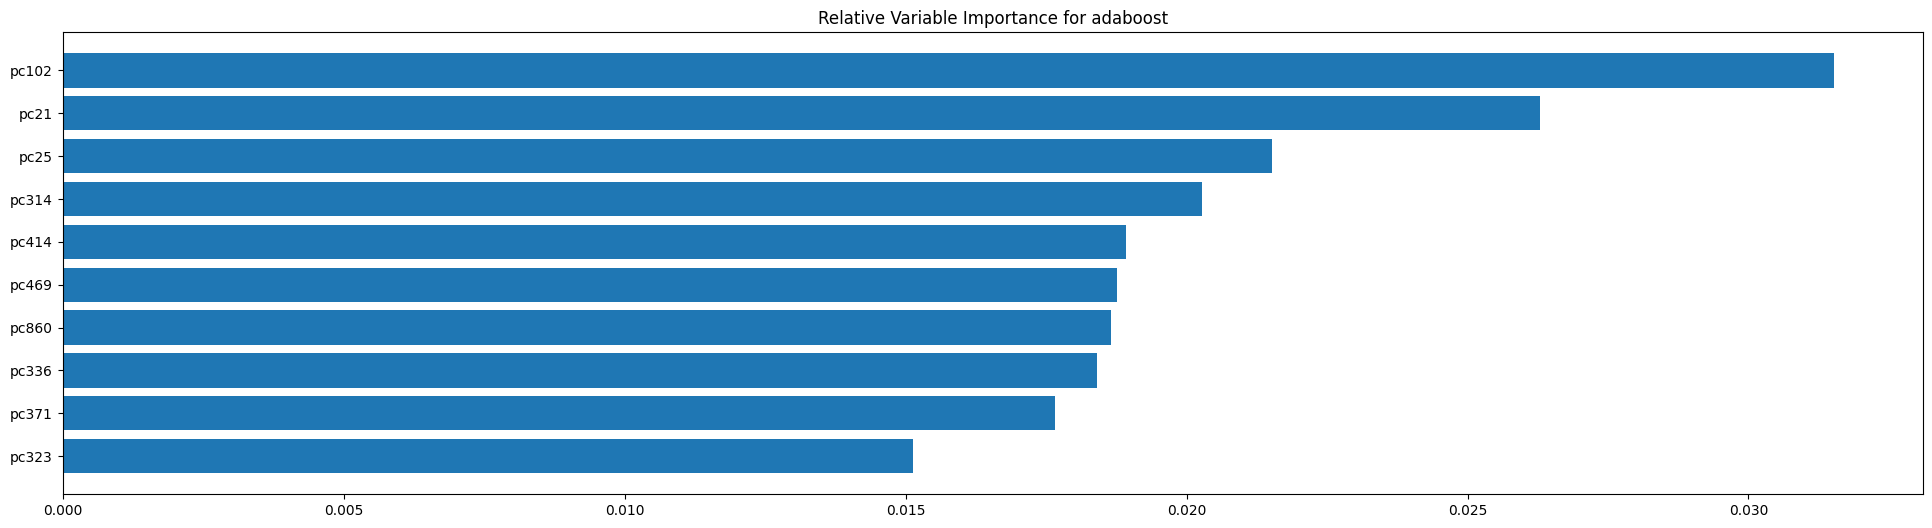

In [34]:
X = features[np.flip(np.argsort(adaboost.feature_importances_))]
fig, axs = plt.subplots(1,1, figsize=(24,6))
models = {'adaboost': adaboost} 
num_features = 10 
for i, (name, model) in enumerate(models.items()):
    importances = model.feature_importances_
    order = np.argsort(importances)[-num_features:]
    axs.barh(range(num_features), importances[order], tick_label=X[order]);
    axs.set_title(f"Relative Variable Importance for {name}")

In [35]:
train_preds = adaboost.predict(tfidf_pca_train)
dev_preds = adaboost.predict(tfidf_pca_dev)
test_preds = adaboost.predict(tfidf_pca_test)

In [36]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8533081451542044
Accuracy Dev:  0.8343299331691875
Accuracy Test:  0.8468025298664793
F1 Train:  0.8541267185407689
F1 Dev:  0.8330478354756079
F1 Test:  0.8503313459852502
Precision Train:  0.8549552349961186
Precision Dev:  0.8317748758398955
Precision Test:  0.8540137383749841
Recall Train:  0.8533081451542044
Recall Dev:  0.8343299331691875
Recall Test:  0.8468025298664793
Confusion Matrix Train: 
[[  320  1642     0]
 [ 1691 19083     4]
 [    0     2    20]]
Confusion Matrix Dev: 
[[  34  238    0]
 [ 231 2338    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  49  201    0]
 [ 231 2361    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
filename = 'adab_tfidf_pca.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### Sentence Transformer Faster No PCA

In [38]:
train, dev, test = load_sent_trans_fast_no_pca()

In [39]:
train.shape

(22762, 384)

In [40]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [41]:
train_preds = adaboost.predict(train)
dev_preds = adaboost.predict(dev)
test_preds = adaboost.predict(test)

In [42]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8351638696072401
Accuracy Dev:  0.8332747098135772
Accuracy Test:  0.8295853829936753
F1 Train:  0.8543501584684046
F1 Dev:  0.8488467295133384
F1 Test:  0.8490839437945465
Precision Train:  0.8797658129759514
Precision Dev:  0.8692387265494607
Precision Test:  0.8750528456595645
Recall Train:  0.8351638696072401
Recall Dev:  0.8332747098135772
Recall Test:  0.8295853829936753
Confusion Matrix Train: 
[[  812  1150     0]
 [ 2596 18179     3]
 [    0     3    19]]
Confusion Matrix Dev: 
[[ 114  158    0]
 [ 314 2255    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 103  147    0]
 [ 334 2258    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
filename = 'sen_t_fast_no_pca.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### Sentence Transformer Faster PCA

In [44]:
train, dev, test = load_sent_trans_fast_pca()

In [45]:
train.shape

(22762, 251)

In [46]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [47]:
train_preds = adaboost.predict(train)
dev_preds = adaboost.predict(dev)
test_preds = adaboost.predict(test)

In [48]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8199191635181443
Accuracy Dev:  0.8132254660569821
Accuracy Test:  0.8179901616303584
F1 Train:  0.8431307325187549
F1 Dev:  0.8349145646693291
F1 Test:  0.8417736476850288
Precision Train:  0.8739611920003589
Precision Dev:  0.8643607315928905
Precision Test:  0.8745686348020801
Recall Train:  0.8199191635181443
Recall Dev:  0.8132254660569821
Recall Test:  0.8179901616303584
Confusion Matrix Train: 
[[  760  1202     0]
 [ 2890 17888     0]
 [    0     7    15]]
Confusion Matrix Dev: 
[[ 113  159    0]
 [ 370 2199    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 107  143    0]
 [ 371 2221    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
filename = 'sen_t_fast_pca.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### Sentence Transformer Better No PCA

In [50]:
train, dev, test = load_sent_trans_better_no_pca()

In [51]:
train.shape

(22762, 768)

In [52]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [53]:
train_preds = adaboost.predict(train)
dev_preds = adaboost.predict(dev)
test_preds = adaboost.predict(test)

In [54]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8825674369563308
Accuracy Dev:  0.8730214562082308
Accuracy Test:  0.8794799718903724
F1 Train:  0.8823792876923818
F1 Dev:  0.8725904884980649
F1 Test:  0.8788271436818323
Precision Train:  0.8822076514829829
Precision Dev:  0.8721603128925309
Precision Test:  0.8781779294270047
Recall Train:  0.8825674369563308
Recall Dev:  0.8730214562082308
Recall Test:  0.8794799718903724
Confusion Matrix Train: 
[[  623  1339     0]
 [ 1326 19450     2]
 [    0     6    16]]
Confusion Matrix Dev: 
[[  92  180    0]
 [ 179 2390    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  79  171    0]
 [ 168 2424    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
filename = 'sen_t_better_no_pca.sav'
pickle.dump(adaboost, open(filename, 'wb'))

### Sentence Transformer Better PCA

In [56]:
train, dev, test = load_sent_trans_better_pca()

In [57]:
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [58]:
train_preds = adaboost.predict(train)
dev_preds = adaboost.predict(dev)
test_preds = adaboost.predict(test)

In [59]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.8905192865301819
Accuracy Dev:  0.8913119943721421
Accuracy Test:  0.8952916373858046
F1 Train:  0.8828159331500104
F1 Dev:  0.8810802874064486
F1 Test:  0.8869877813619165
Precision Train:  0.8765196750575535
Precision Dev:  0.8739795361397081
Precision Test:  0.8806261343951665
Recall Train:  0.8905192865301819
Recall Dev:  0.8913119943721421
Recall Test:  0.8952916373858046
Confusion Matrix Train: 
[[  460  1502     0]
 [  980 19795     3]
 [    0     7    15]]
Confusion Matrix Dev: 
[[  73  199    0]
 [ 108 2461    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  67  183    0]
 [ 111 2481    1]
 [   0    3    0]]


C:\Users\Raghav Sahni\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
filename = 'sen_t_better_pca.sav'
pickle.dump(adaboost, open(filename, 'wb'))